<a href="https://colab.research.google.com/github/avadhutc/Session4/blob/master/code/EVA_Session_4_Second_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Change No: 1    Vanilla Network with Parameters less than 15K 
## Parameters reduced with reducing no of kernels(3,3) to 16 in one of middle layer
## No of kernels(3,3) in layers as follow: 15, 32, 16, 64

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras # install keras package
import keras # import keras package for use

Using TensorFlow backend.


In [0]:
import numpy as np # import numpy package alias np

from keras.models import Sequential # import Sequential flow to build model
from keras.layers import Flatten # import flatten layer to convert any dimensional layer into one di
from keras.layers import Convolution2D, MaxPooling2D # for doing convolution and maxpooling on image 
from keras.utils import np_utils # utility functions

from keras.datasets import mnist# import mnist dataset
from matplotlib import pyplot as plt # import pyplot alias plt for plotting
#%matplotlib inline # print results in notebook cells

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()# download mnist dataset and load for training and testing sets

(60000, 28, 28)


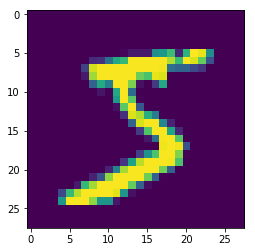

In [0]:
print (X_train.shape) # print shape of X_train dataset
 


plt.imshow(X_train[0]) # display image

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) # reshape or arrange train dataset for all images with 1 channel 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)# reshape or arrange test dataset for all images with 1 channel

In [0]:
X_train = X_train.astype('float32') # set datatype of training dataset as float32
X_test = X_test.astype('float32')# set datatype of test dataset as float32
X_train /= 255 # normalize training dataset between 0 and 1
X_test /= 255 # normalize tes dataset between 0 and 1

In [0]:
y_train[:10] # training set labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)# convert train labels into one-hot encodings
Y_test = np_utils.to_categorical(y_test, 10)# convert test labels into one-hot encodings

In [0]:
Y_train[:10]# print first 10 train labels


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(15, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 15, RF = 3, out_img_size = 26

model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 15, output channel dimension= 32, RF = 5, out_img_size = 24

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(16, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 16, RF = 10, out_img_size = 10

model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 16, output channel dimension= 10, RF = 10, out_img_size = 10

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 14, out_img_size = 8

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 15, out_img_size = 4
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 15, out_img_size = 4
 
model.add(Convolution2D(10, 4)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 26, 26, 15)        150       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 24, 24, 32)        4352      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 10, 10, 10)        170       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 8, 8, 64)          5824      
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 218us/step - loss: 0.2057 - acc: 0.9361 - val_loss: 0.0871 - val_acc: 0.9731

Epoch 00001: val_acc improved from -inf to 0.97310, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.0720 - acc: 0.9776 - val_loss: 0.0551 - val_acc: 0.9823

Epoch 00002: val_acc improved from 0.97310 to 0.98230, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.0567 - acc: 0.9827 - val_loss: 0.0420 - val_acc: 0.9869

Epoch 00003: val_acc improved from 0.98230 to 0.98690, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.0480 - acc: 0.9848 - val_loss: 0.0343 - val_acc: 0.9873

Epoch 00004: val_acc improved from 0.98690 to 0.98730, saving model to best_mnist_cnn_model.h5
Epoch 5/30
60

# Visualization

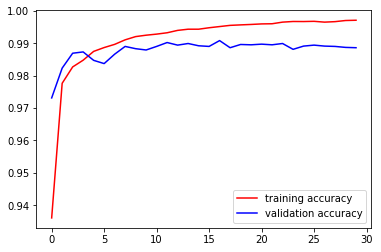

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

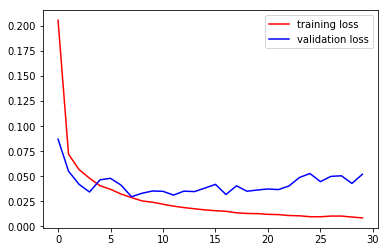

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05200387882014881, 0.9886]


# Maximum Validation Accuracy achieved 99.08% @ 17th epoch with 14.5 K parameters

# Change No: 2
## No of kernels(3,3) changes from 15, 32, 16, 64 to 14, 24, 30, 64

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 14, RF = 3, out_img_size = 26

model.add(Convolution2D(24, 3, 3, activation='relu')) # Input Channel dimension= 14, output channel dimension= 24, RF = 5, out_img_size = 24

model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 24, output channel dimension= 24, RF = 6, out_img_size = 12
model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 24, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(30, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 30, RF = 14, out_img_size = 10

model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 30, output channel dimension= 10, RF = 14, out_img_size = 10

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 18, out_img_size = 8

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 19, out_img_size = 4
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 19, out_img_size = 4
 
model.add(Convolution2D(10, 4)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 26, 26, 14)        140       
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 24, 24, 24)        3048      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 24)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 12, 12, 10)        250       
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 10, 10, 30)        2730      
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 10, 10, 10)        310       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 8, 8, 64)          5824      
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.2224 - acc: 0.9299 - val_loss: 0.0705 - val_acc: 0.9770

Epoch 00001: val_acc improved from -inf to 0.97700, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 11s 184us/step - loss: 0.0729 - acc: 0.9775 - val_loss: 0.0536 - val_acc: 0.9836

Epoch 00002: val_acc improved from 0.97700 to 0.98360, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 11s 184us/step - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0461 - val_acc: 0.9865

Epoch 00003: val_acc improved from 0.98360 to 0.98650, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 12s 205us/step - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0389 - val_acc: 0.9864

Epoch 00004: val_acc did not improve from 0.98650
Epoch 5/30
60000/60000 [==============================] - 

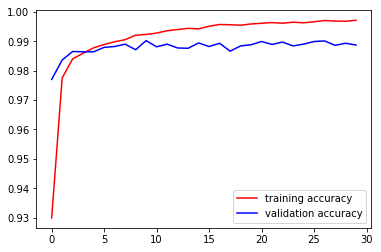

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

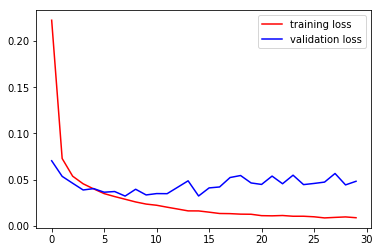

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04826941552214062, 0.9887]


# Maximum Validation Accuracy achieved 99.02% @ 10th epoch with 14.5 K parameters

# Change No: 3
## No of kernels(3,3) changes from 14, 24, 30, 64 to 16, 32, 64 (increasing order only)

In [0]:
from keras.layers import Activation, BatchNormalization

model = Sequential() # Sequential model
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Input Channel dimension= 1, output channel dimension= 16, RF = 3, out_img_size = 26


model.add(Convolution2D(32, 3, 3, activation='relu')) # Input Channel dimension= 16, output channel dimension= 32, RF = 5, out_img_size = 24


model.add(MaxPooling2D(pool_size = (2, 2))) # Input Channel dimension= 32, output channel dimension= 32, RF = 6, out_img_size = 12

model.add(Convolution2D(10, 1, activation='relu')) # Input Channel dimension= 32, output channel dimension= 10, RF = 6, out_img_size = 12

model.add(Convolution2D(64, 3, 3, activation='relu'))# Input Channel dimension= 10, output channel dimension= 64, RF = 10, out_img_size = 10

model.add(MaxPooling2D(pool_size = (2, 2)))# Input Channel dimension= 64, output channel dimension= 64, RF = 11, out_img_size = 5
model.add(Convolution2D(10, 1, activation='relu'))# Input Channel dimension= 64, output channel dimension= 10, RF = 11, out_img_size = 5
 
model.add(Convolution2D(10, 5)) # Input Channel dimension= 10, output channel dimension= 10, RF = 27, out_img_size = 1

model.add(Flatten()) #flatten image dimension into 1
model.add(Activation('softmax'))# softmax to assign confidence score of each class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 10, 10, 64)        5824      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 5, 5, 10)          650       
__________

In [0]:
# import callbacks
from keras.callbacks import ModelCheckpoint

In [0]:
# save best weights 
final_weights_path = 'best_mnist_cnn_model.h5'

In [0]:
callbacks_list = [ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)]  


In [0]:
# model compilation
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model training
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, validation_data=(X_test,Y_test),callbacks = callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 184us/step - loss: 0.1974 - acc: 0.9372 - val_loss: 0.0650 - val_acc: 0.9804

Epoch 00001: val_acc improved from -inf to 0.98040, saving model to best_mnist_cnn_model.h5
Epoch 2/30
60000/60000 [==============================] - 10s 163us/step - loss: 0.0653 - acc: 0.9804 - val_loss: 0.0453 - val_acc: 0.9853

Epoch 00002: val_acc improved from 0.98040 to 0.98530, saving model to best_mnist_cnn_model.h5
Epoch 3/30
60000/60000 [==============================] - 10s 164us/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0310 - val_acc: 0.9895

Epoch 00003: val_acc improved from 0.98530 to 0.98950, saving model to best_mnist_cnn_model.h5
Epoch 4/30
60000/60000 [==============================] - 10s 175us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0359 - val_acc: 0.9886

Epoch 00004: val_acc did not improve from 0.98950
Epoch 5/30
60000/60000 [==============================] - 

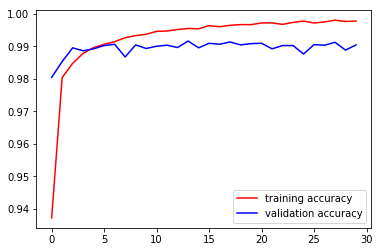

In [0]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

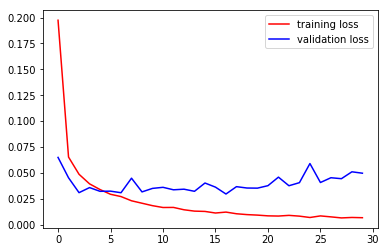

In [0]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [0]:
#model score accuarcy on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04976296626329897, 0.9904]


# Maximum Validation Accuracy achieved 99.16% @ 14th epoch with 14.1 K parameters
# Let's forward this network to 3rd notebook